# RESPOSTAS DESAFIOS DA AULA 05 - EVANDRO AVELLAR

- Foram mantidos alguns exemplos antes da resolução dos Desafios para comparação
- 25/04/2020

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


from string import ascii_letters

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

#uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
uri = "dados/MICRODADOS_ENEM_2018_SAMPLE_43278.txt"
dados = pd.read_csv(uri)

In [4]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']

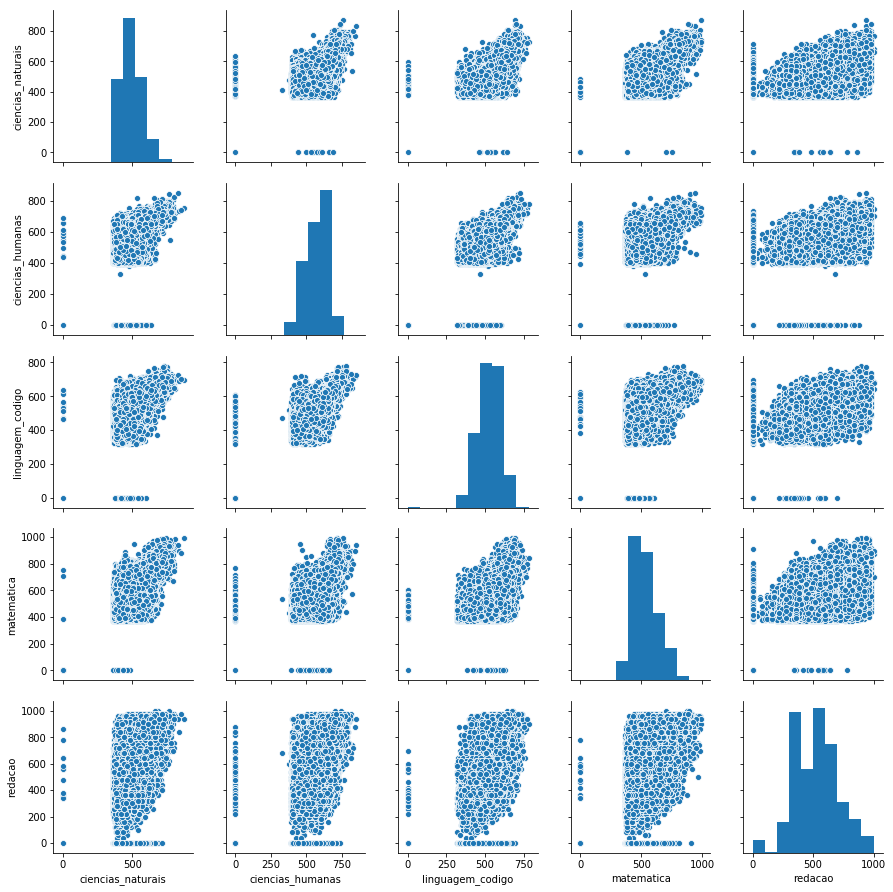

In [5]:
sns.pairplot(dados_notas)

In [6]:
x_4_notas = dados_notas[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']]
x_4_notas.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
1,523.10,671.30,738.00,680.00
2,409.20,531.70,438.10,600.00
3,452.30,505.50,544.90,400.00
6,428.50,505.20,436.80,560.00
8,491.80,575.70,487.60,660.00


In [7]:
y_adivinhar = dados_notas['linguagem_codigo']
print(y_adivinhar.shape)
y_adivinhar.head()


(97270,)


1   661.60
2   389.00
3   448.50
6   521.00
8   524.40
Name: linguagem_codigo, dtype: float64

In [8]:
np.random.seed(43267)

# f(x) = y
x_treino, x_teste, y_treino, y_teste = train_test_split(x_4_notas, y_adivinhar, random_state = 326784)

print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(72952, 4)
(24318, 4)
(72952,)
(24318,)


In [9]:
modelo = LinearSVR()
modelo.fit(x_treino, y_treino)

/home/avellar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [10]:
predicoes_notas_linguagem = modelo.predict(x_teste)

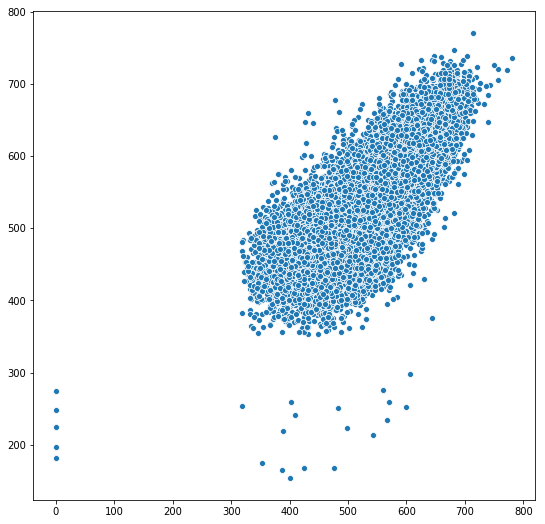

In [11]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

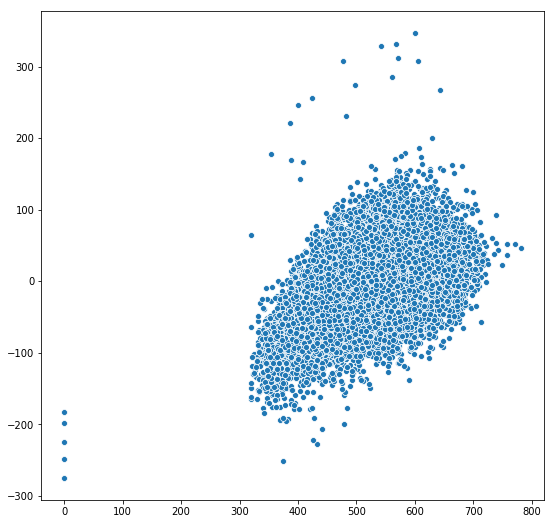

In [12]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste.values - predicoes_notas_linguagem)

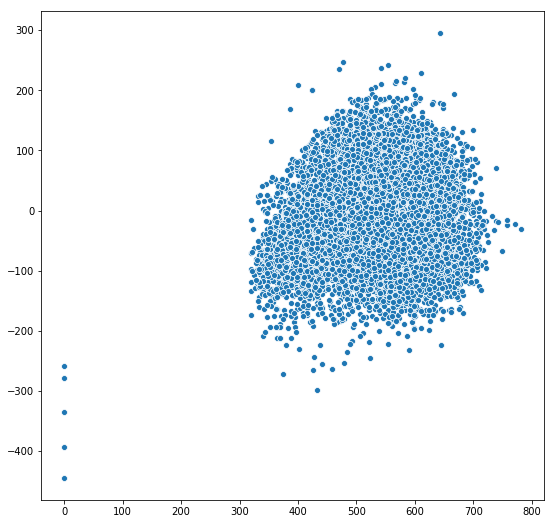

In [13]:
# minha predição TOSCA. Dummy!
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste - x_teste.mean(axis=1))


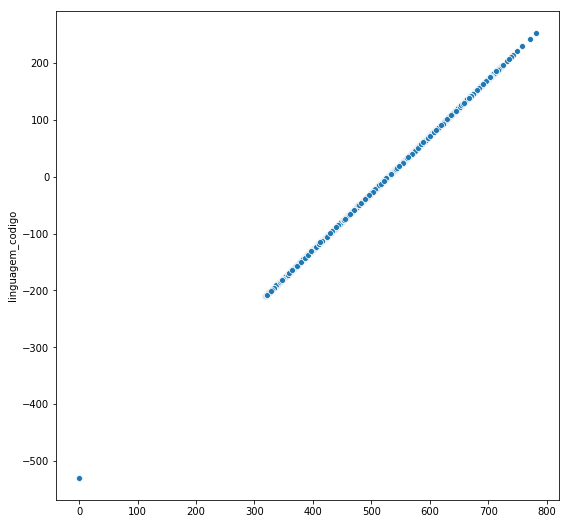

In [14]:
# predição do paulo TOSCA. Dummy!
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste - y_treino.mean())

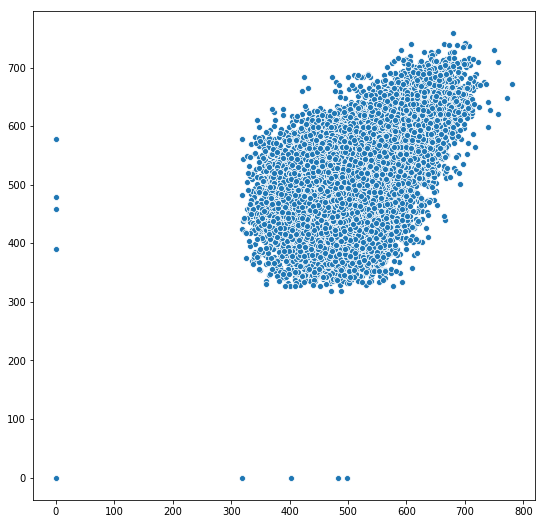

In [15]:
modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

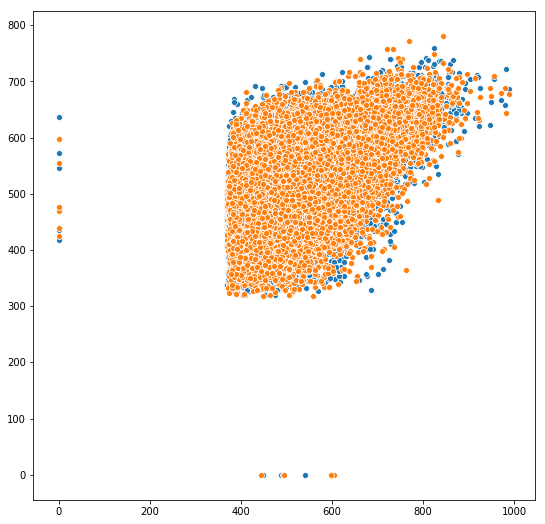

In [16]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=x_teste['matematica'].values, y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste['matematica'].values, y=y_teste.values)

In [17]:
mean_squared_error(y_teste, predicoes_notas_linguagem)

4160.601726293281

In [18]:
modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste, dummy_predicoes)

5137.479089212121

# RESPOSTAS DESAFIOS DA AULA 05 - EVANDRO AVELLAR

## Desafio 1 da [Allan Spadini](https://twitter.com/allanspadini)

Explore os parâmetros C e o max_iter do modelo LinesSVR. Não há garantias que o resultado será melhor.

#### C : float, optional (default=1.0)
    Penalty parameter C of the error term. The penalty is a squared
    l2 penalty. The bigger this parameter, the less regularization is used.
    
#### max_iter : int, (default=1000)
    The maximum number of iterations to be run.  

In [19]:
#uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
uri = "dados/MICRODADOS_ENEM_2018_SAMPLE_43278.txt"
dados = pd.read_csv(uri)


colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']


x_4_notas = dados_notas[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']]

y_adivinhar = dados_notas['linguagem_codigo']



In [20]:
# Sem os parâmetros

SEED = 5

np.random.seed(SEED)

x_treino, x_teste, y_treino, y_teste = train_test_split(x_4_notas, y_adivinhar)


modelo = LinearSVR() # Sem parâmetros
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

MSE_01 = mean_squared_error(y_teste, dummy_predicoes)

print("Treinamento com {} elementos e testes com {} elementos".format(len(x_treino), len(x_teste)))
print("")
print("- MSE sem os parâmetros {:.2f}\n".format(MSE_01))

Treinamento com 72952 elementos e testes com 24318 elementos

- MSE sem os parâmetros 5096.06



/home/avellar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [21]:
SEED = 5

np.random.seed(SEED)

x_treino, x_teste, y_treino, y_teste = train_test_split(x_4_notas, y_adivinhar)

PARAMETRO_C = 20000
ITER_M = 10

modelo = LinearSVR(C=PARAMETRO_C, max_iter=ITER_M)  # Com parâmetros
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

MSE_02 = mean_squared_error(y_teste, dummy_predicoes)

print("Treinamento com {} elementos e testes com {} elementos".format(len(x_treino), len(x_teste)))
print("")
print("- MSE anterior de {:.2f}\n"
      "- Novo MSE com parametros {:.2f}\n"
          "Parâmetro C de {} \n"
          "Parametro max_iter de {}".format(MSE_01, MSE_02, PARAMETRO_C, ITER_M))

Treinamento com 72952 elementos e testes com 24318 elementos

- MSE anterior de 5096.06
- Novo MSE com parametros 5096.06
Parâmetro C de 20000 
Parametro max_iter de 10


/home/avellar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [22]:
PARAMETRO_C = 0.000001
ITER_M = 10000

modelo = LinearSVR(C=PARAMETRO_C, max_iter=ITER_M) # Com parâmetros
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

MSE_02 = mean_squared_error(y_teste, dummy_predicoes)

print("Treinamento com {} elementos e testes com {} elementos".format(len(x_treino), len(x_teste)))
print("")
print("- MSE anterior de {:.2f}\n"
      "- Novo MSE com parametros {:.2f}\n"
          "Parâmetro C de {} \n"
          "Parametro max_iter de {}".format(MSE_01, MSE_02, PARAMETRO_C, ITER_M))

Treinamento com 72952 elementos e testes com 24318 elementos

- MSE anterior de 5096.06
- Novo MSE com parametros 5096.06
Parâmetro C de 1e-06 
Parametro max_iter de 10000


# Conclusão: não há efeito, neste exemplo, com alteração de parâmetros

## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

No gráfico em que plotamos a média com o valor previsto, plote a média das 4 notas ao invés de uma.

In [23]:
x_teste_medias = x_teste.copy()
x_teste_medias['media_das_notas'] = x_teste_medias[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']].mean(axis=1)

In [24]:
x_teste_medias.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao,media_das_notas
131288,405.40,479.50,381.60,540.00,451.62
25012,610.20,651.90,741.40,660.00,665.88
112548,475.70,527.00,541.60,480.00,506.08
38431,515.10,584.80,440.10,500.00,510.00
78299,586.60,646.40,545.20,900.00,669.55


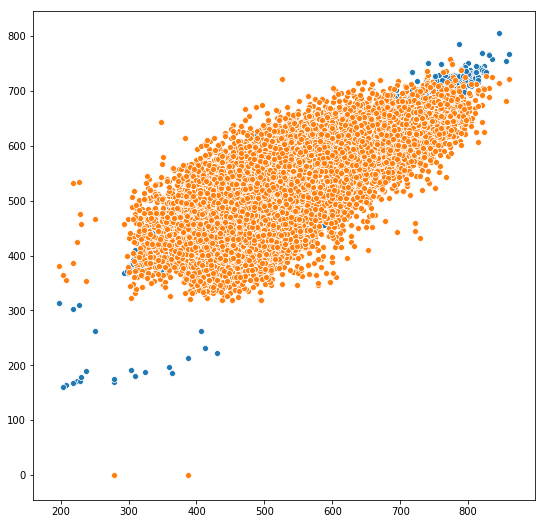

In [25]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=x_teste_medias['media_das_notas'].values, y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste_medias['media_das_notas'].values, y=y_teste.values)


## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Remover as notas zero e testar os mesmos modelos, comparando o resultado

Como as amostras precisam ter o mesmo número de registros, para retirar os zeros a linha inteira deve ser excluida para qualquer nota zero.

In [26]:
dados_notas.describe()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
count,"97,270.00","97,270.00","97,270.00","97,270.00","97,270.00"
mean,493.69,570.98,528.68,535.23,516.45
std,74.13,78.86,71.83,102.74,184.09
min,0.00,0.00,0.00,0.00,0.00
25%,435.50,514.00,478.00,455.70,360.00
50%,483.60,584.90,533.30,516.60,520.00
75%,542.60,629.70,581.38,600.10,640.00
max,869.60,850.40,781.40,989.90,"1,000.00"


### Como os valores zeros das notas dos dados de x são variáveis por tipo de disciplina, vou adotar retirar todos os alunos que tenham no mínimo uma nota zero

In [27]:
dados_notas.shape

(97270, 5)

In [28]:
dados_notas_nan = dados_notas.replace({0.00:np.nan})
dados_notas_sem_zeros = dados_notas_nan.dropna()
dados_notas_sem_zeros.shape

(95181, 5)

In [29]:

x_4_notas = dados_notas_sem_zeros[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']]

y_adivinhar = dados_notas_sem_zeros['linguagem_codigo']

In [30]:
x_4_notas.query('ciencias_naturais== 0')

,ciencias_naturais,ciencias_humanas,matematica,redacao


In [31]:
x_4_notas.query('ciencias_humanas	== 0')

,ciencias_naturais,ciencias_humanas,matematica,redacao


In [32]:
x_4_notas.query('matematica== 0')

,ciencias_naturais,ciencias_humanas,matematica,redacao


In [33]:
x_4_notas.query('redacao== 0')

,ciencias_naturais,ciencias_humanas,matematica,redacao


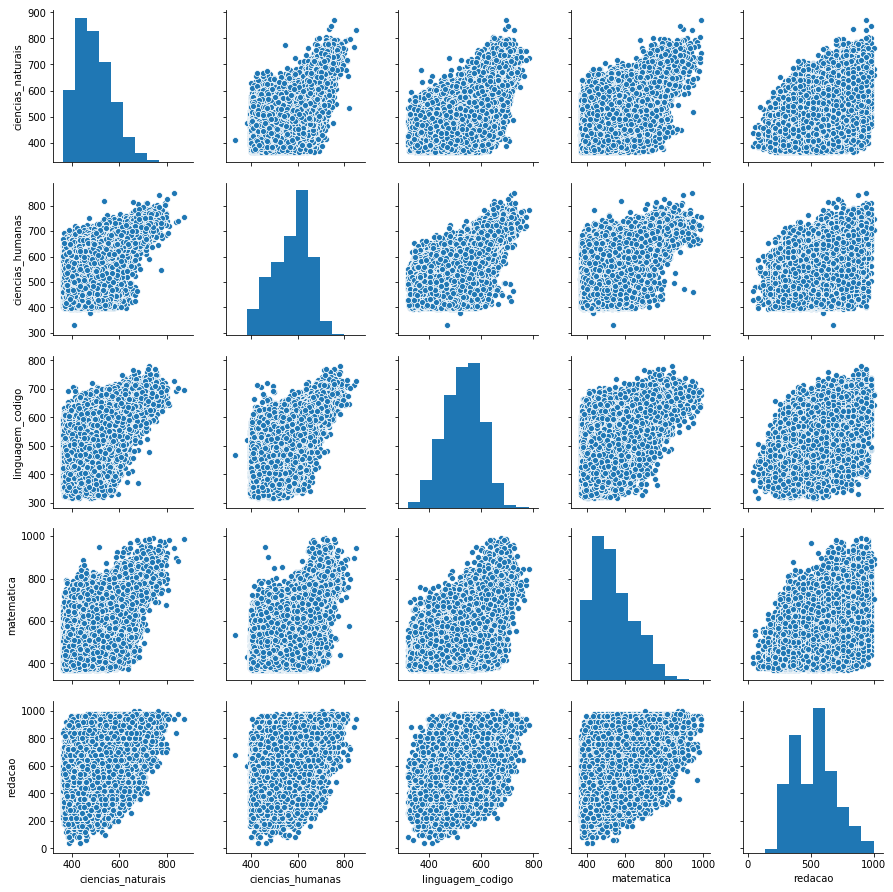

In [34]:
sns.pairplot(dados_notas_sem_zeros)

In [35]:
# Sem os parâmetros

SEED = 5

np.random.seed(SEED)

x_treino, x_teste, y_treino, y_teste = train_test_split(x_4_notas, y_adivinhar)


modelo = LinearSVR() # Sem parâmetros
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

MSE_01 = mean_squared_error(y_teste, dummy_predicoes)

print("Treinamento com {} elementos e testes com {} elementos".format(len(x_treino), len(x_teste)))
print("")
print("- MSE sem os parâmetros {:.2f}\n".format(MSE_01))

Treinamento com 71385 elementos e testes com 23796 elementos

- MSE sem os parâmetros 5030.44



/home/avellar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [36]:
PARAMETRO_C = 0.000001
ITER_M = 10000

modelo = LinearSVR(C=PARAMETRO_C, max_iter=ITER_M) # Com parâmetros
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

MSE_02 = mean_squared_error(y_teste, dummy_predicoes)

print("Treinamento com {} elementos e testes com {} elementos".format(len(x_treino), len(x_teste)))
print("")
print("- MSE anterior de {:.2f}\n"
      "- Novo MSE com parametros {:.2f}\n"
          "Parâmetro C de {} \n"
          "Parametro max_iter de {}".format(MSE_01, MSE_02, PARAMETRO_C, ITER_M))

Treinamento com 71385 elementos e testes com 23796 elementos

- MSE anterior de 5030.44
- Novo MSE com parametros 5030.44
Parâmetro C de 1e-06 
Parametro max_iter de 10000


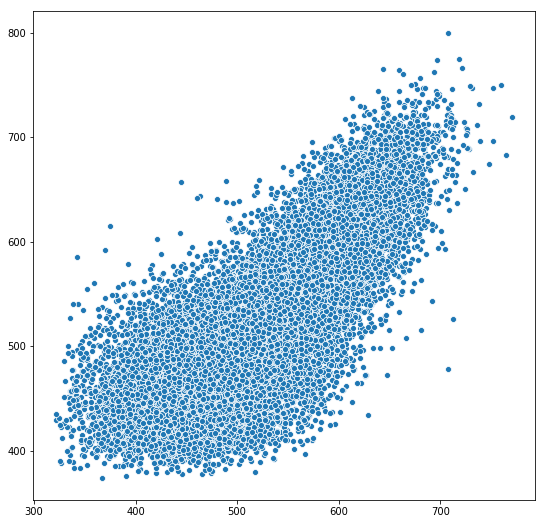

In [37]:
predicoes_notas_linguagem = modelo.predict(x_teste)
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

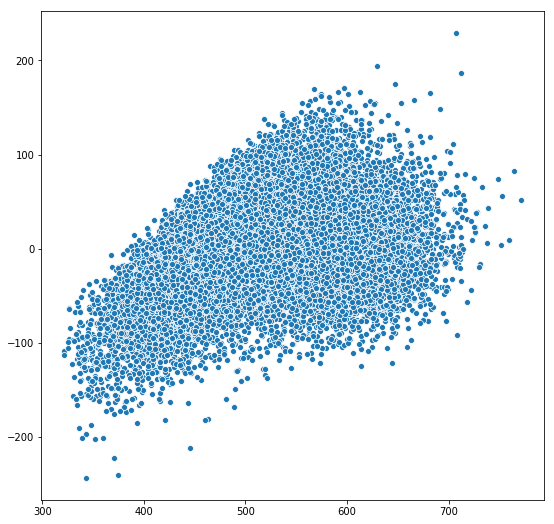

In [38]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste.values - predicoes_notas_linguagem)

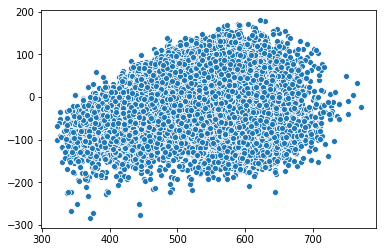

In [39]:
sns.scatterplot(x=y_teste.values, y=y_teste - x_teste.mean(axis=1))

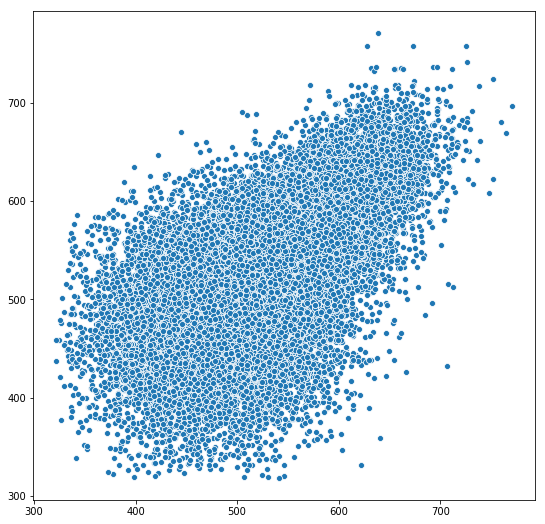

In [40]:

modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

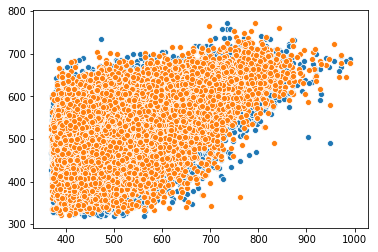

In [41]:
sns.scatterplot(x=x_teste['matematica'].values, y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste['matematica'].values, y=y_teste.values)

In [42]:
x_teste_medias = x_teste.copy()
x_teste_medias['media_das_notas'] = x_teste_medias[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']].mean(axis=1)

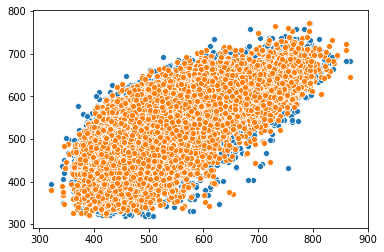

In [43]:
sns.scatterplot(x=x_teste_medias['media_das_notas'].values, y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste_medias['media_das_notas'].values, y=y_teste.values)


## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Interpretar tudo que foi feito e compartilhar suas conclusões

##### Desafio 01 - Explore os parâmetros C e o max_iter do modelo LinesSVR. Não há garantias que o resultado será melhor.
- Os parâmetros C e o max_iter do LinesSVR não alterou o resultado

##### Desafio 02 - No gráfico em que plotamos a média com o valor previsto, plote a média das 4 notas ao invés de uma.
- O gráfico ficou com uma correlação mais forte, podendo ser visto uma tendencia linear maior

#### Desafio03 - Remover as notas zero e testar os mesmos modelos, comparando o resultado
- Os gráficos apenas se deslocaram com a retirada dos zeros, mas o resultado do MSE reduziu um pouco.


## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Calcule as métricas de erro que utilizamos (mean square root error) também no conjunto de treino, e veja o que acontece comparado com o conjunto de teste.

In [44]:

SEED = 5

np.random.seed(SEED)

x_treino, x_teste, y_treino, y_teste = train_test_split(x_4_notas, y_adivinhar)


modelo = LinearSVR()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)
dummy_predicoes_t = modelo_dummy.predict(x_treino)

MSE_04 = mean_squared_error(y_teste, dummy_predicoes)
MSE_05 = mean_squared_error(y_treino, dummy_predicoes_t)


print("Treinamento com {} elementos e testes com {} elementos".format(len(x_treino), len(x_teste)))
print("")
print("- MSE de teste {:.2f}".format(MSE_04))
print("- MSE de treino {:.2f}".format(MSE_05))

Treinamento com 71385 elementos e testes com 23796 elementos

- MSE de teste 5030.44
- MSE de treino 5009.40


/home/avellar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Resultado com o conjunto de treino é melhor

## Desafio 6 do [Allan Spadini](https://twitter.com/allanspadini)

Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.

Ética no tratamento de dados deve ir além da privacidade: a ética deve ser considerada e incluída em todas as sete etapas do ciclo de vida dos dados. Heather Krause, em seu artigo Are Ethics in Data Science really that important?, para o Case Experts, refere-se ao fato de que as publicações e os especialistas em dados tendem a se concentrar mais na privacidade porque, muitas vezes, é bem mais fácil abordar questões de privacidade do que lidar com aspectos da incorporação da ética na cadeia de uso das informações no negócio.

O debate sobre o assunto está só começando, as considerações são extensas e, até o momento, estão abertas a diversas interpretações. Mas se tratando da Lei Geral de Proteção de Dados Pessoais, o que devemos e podemos já fazer? Em primeiro lugar, voltar aos pontos mais básicos da lei, que remetem diretamente a respeitar o direito de privacidade.


O campo da ética aplicada a IA ainda está em desenvolvimento. Muitos avanços foram feitos para evitar o erro do viés e fornecer uma capacidade de explicação razoável para os algoritmos de Aprendizado de Máquina, analisando e isolando as chamadas variáveis latentes. Porém, é importante que a velocidade do desenvolvimento de algoritmos ajustados a princípios éticos esteja alinhada à própria velocidade de avanço da IA e sua regulamentação de uso. Esse é um grande desafio, pois normalmente os avanços tecnológicos acontecem mais rápido do que a resposta das sociedades em forma de legislação. Por isso, de momento cabe aos desenvolvedores de sistemas de IA que estejam atentos à aplicação de princípios éticos no desenvolvimento de suas aplicações.

Fonte: https://www.serpro.gov.br/lgpd/noticias/2019/tratamento-etico-dados-pessoais-ciencia-data-science

Fonte: https://tiinside.com.br/23/04/2020/etica-em-inteligencia-artificial-e-a-covid-19/

#Não esqueça de compartilhar a solução dos seus desafios com nossos instrutores, seja no Twitter, seja LinkedIn. Boa sorte!